In [17]:
import acquire
import prepare
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [18]:
df = acquire.get_iris_data()

In [19]:
df = prepare.prep_iris(df)

In [20]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
0,setosa,5.1,3.5,1.4,0.2,0
1,setosa,4.9,3.0,1.4,0.2,0
2,setosa,4.7,3.2,1.3,0.2,0
3,setosa,4.6,3.1,1.5,0.2,0
4,setosa,5.0,3.6,1.4,0.2,0


In [21]:
# Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df
train_df, test_df = train_test_split(df, test_size = .30, random_state=123)

In [22]:
train_df.shape

(105, 6)

In [23]:
test_df.shape

(45, 6)

In [24]:
train_df.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encode'],
      dtype='object')

In [27]:
melted_df = pd.melt(df[['species', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width']],
                    id_vars=['species'],
                    var_name='independent_variable'
                    ,value_name='value')
melted_df #melts all into one line   

,species,independent_variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
5,setosa,sepal_length,5.4
6,setosa,sepal_length,4.6
7,setosa,sepal_length,5.0
8,setosa,sepal_length,4.4
9,setosa,sepal_length,4.9


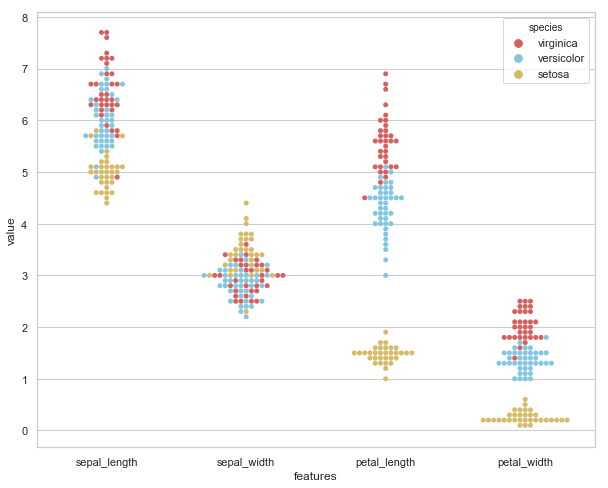

In [28]:
# Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). 
# The y-axis is the value of the variable. Use color to represent species as another dimension. 
#Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. 
# What are your takeaways from this visualization?
# sns.swarmplot(x="melted_df.independent_variable", y="melted_df.value", data=melted_df, hue="species", palette="Set2")


sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df[['species', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width']], "species", var_name="features")

plt.figure(figsize=(10,8))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="features", y="value", hue="species",
              palette=["r", "c", "y"], data=df_melt)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


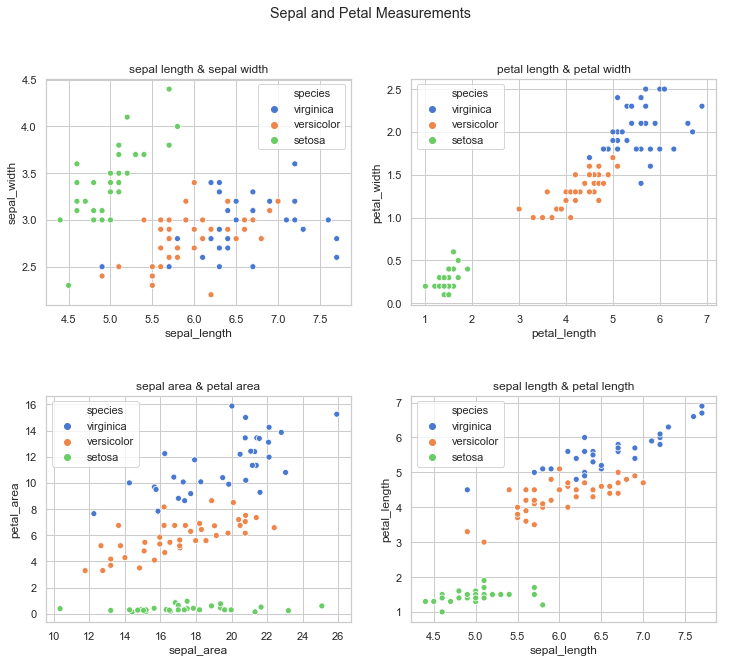

In [29]:
# Create 4 subplots (2 rows x 2 columns) of scatterplots
# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length
# Make your figure size 14 x 8. What are your takeaways?

sepal_area = (train_df.sepal_length * train_df.sepal_width)
train_df['sepal_area'] = sepal_area #Creates new column for above 

petal_area = (train_df.petal_length * train_df.petal_width)
train_df['petal_area'] = petal_area



plt.figure(figsize=(12, 10))
plt.suptitle('Sepal and Petal Measurements')

plt.subplot(221)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=train_df)
plt.title('sepal length & sepal width')

plt.subplot(222)
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data=train_df)
plt.title('petal length & petal width')

plt.subplot(223)
sns.scatterplot(x='sepal_area', y='petal_area',hue='species', data=train_df)
plt.title('sepal area & petal area')

plt.subplot(224)
sns.scatterplot(x='sepal_length', y='petal_length',hue='species', data=train_df)
plt.title('sepal length & petal length')

plt.subplots_adjust(hspace=0.4)


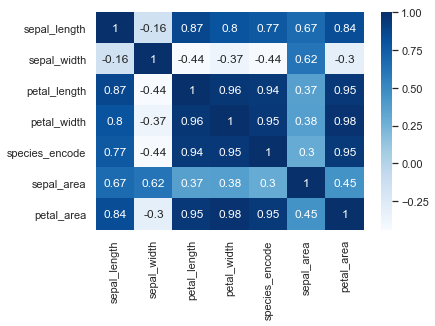

In [30]:
# Create a heatmap of each variable layering correlation coefficient on top.
sns.heatmap(train_df.corr(), cmap='Blues', annot=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


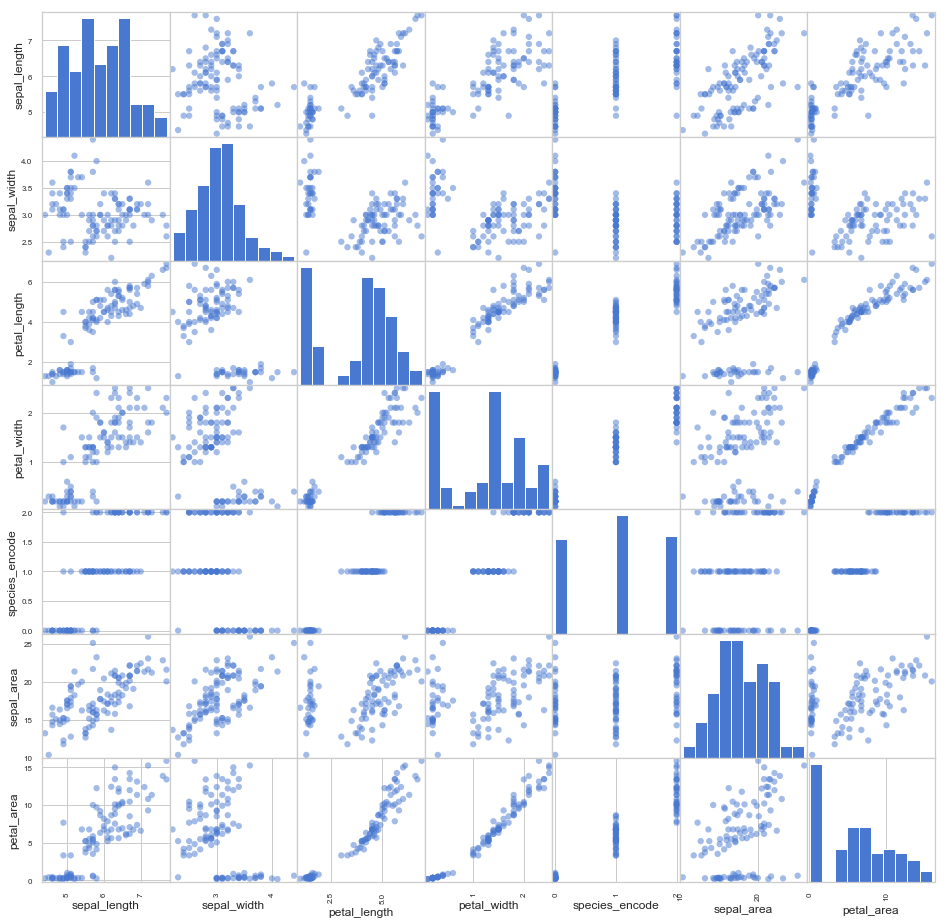

In [31]:
# Create a scatter matrix visualizing the interaction of each variable
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df, marker='o', s=40,  figsize=(16,16), cmap=cmap)

In [32]:
# Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.
# ----------------------
# must include null hypothesis, alternative hyp, t-test, results, summary
# H0: the difference in sepal length between virginica and versicolor is insignificant.
# Ha: the difference in sepal length between virginica and versicolor is substantial.
# We will test if the sepal length of virginica is significantly different than that of the versicolor.
# If there is difference, then variable sepal_length is a good choice to keep as a feature.
# We can use a t-test here, as sepal_length is somwhat normally distributed.

In [33]:
# null hyp: H0: the difference in sepal length between virginica and versicolor is insignificant.
# alternative hyp: Ha: the difference in sepal length between virginica and versicolor is substantial.

In [34]:
from scipy.stats import pearsonr, ttest_ind
sepal = pd.DataFrame({'sepal_length': train_df.sepal_area,
                   'species': train_df.species})
sepal = sepal[sepal.species != 'setosa']
sepal.groupby('species').mean()

,sepal_length
species,
versicolor,17.07200
virginica,19.45697


In [35]:
virginica = train_df.where(train_df.species == 'virginica').dropna()
versicolor = train_df.where(train_df.species == 'versicolor').dropna()

ttest_ind(virginica.sepal_length, versicolor.sepal_length)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

In [36]:
# If there is difference, then variable sepal_length is a good choice to keep as a feature:
# The p-value of 6.811720108343317e-05 tells us that there is a significant difference between the sepal length for
# virginica and the sepal length for versicolor. Therefore, it is a good choice to keep this as a feature because
# it can help is predict what species future data points belong to by the sepal length.